We are going to compare Sigmoid, Tangent, Relu, leaky Relu, Elu and Selu

In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# Activation Functions

## Sigmoid and Tangent

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

In [3]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

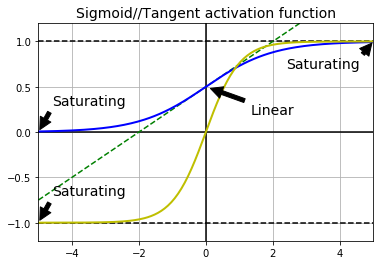

In [4]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-1.2, 1.2], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')

plt.plot([-5, 5], [-3/4, 7/4], 'g--')
# the tangent line must go through (0, 0.5), the slop is g^ at(0,0.5), which is [g(1-g)]=1/4
# hence, the tangent line is y = 1/4 x + 0.5, when x = 5, y = 7/4

plt.plot(z, logit(z), "b-", linewidth=2)

plt.plot(z, tanh(z), "y-", linewidth=2)

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, -0.7), xy=(-5, -1.0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")

plt.grid(True)
plt.title("Sigmoid//Tangent activation function", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.show()

## Relu and Leaky relu

In [5]:
def relu(z):
    return np.maximum(0, z)

In [43]:
def leaky_relu(z):
    alpha=0.09 #for better graph typical 0.01
    return np.maximum(alpha*z, z)

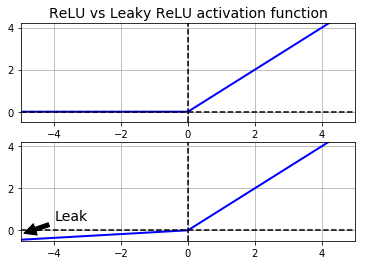

In [44]:
z = np.linspace(-5, 5, 200)

plt.subplot(2, 1, 1)
plt.plot(z, relu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([0, 0], [-0.5, 4.2], 'k--')
plt.grid(True)

plt.axis([-5, 5, -0.5, 4.2])
plt.title("ReLU vs Leaky ReLU activation function", fontsize=14)

plt.subplot(2, 1, 2)
plt.plot(z, leaky_relu(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.plot([-5, 5], [0, 0], 'k--')
plt.plot([0, 0], [-0.5, 4.2], 'k--')
plt.grid(True)

plt.axis([-5, 5, -0.5, 4.2])
plt.show()

## ELU vs SELU

In [8]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z) 
    #Return elements, either from x or y, depending on condition

In [9]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

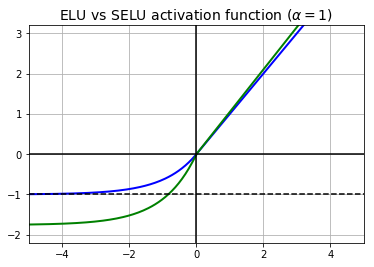

In [10]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot(z, selu(z), "g-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU vs SELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

# Comparison

In [11]:
def leaky_relu(z, name=None):
    return tf.maximum(0.01 * z, z, name=name)

In [45]:
def leaky_relu2(z, name=None):
    return tf.maximum(0.2 * z, z, name=name)

In [12]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

In [13]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [14]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [15]:
result = {}

## sigmoid

In [16]:
reset_graph()

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.sigmoid, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.sigmoid, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 60
batch_size = 30

In [17]:

start_time = time.time()
sub_result = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)
            sub_result.append(acc_valid)

    acc_valid = accuracy.eval(feed_dict={X: X_test, y: y_test})
    sub_result.append(acc_valid)
    print("Final validation accuracy:", acc_valid)
    save_path = saver.save(sess, "./my_model_sigmoid_final.ckpt")

end_time = time.time()
cost_time = end_time - start_time
print("Elapsed time:", cost_time, 's')
sub_result.append(cost_time)

result['sigmoid'] = sub_result

0 Batch accuracy: 0.43333334 Validation accuracy: 0.5548
5 Batch accuracy: 0.93333334 Validation accuracy: 0.8828
10 Batch accuracy: 0.8666667 Validation accuracy: 0.9094
15 Batch accuracy: 0.73333335 Validation accuracy: 0.9172
20 Batch accuracy: 1.0 Validation accuracy: 0.9238
25 Batch accuracy: 0.93333334 Validation accuracy: 0.9278
30 Batch accuracy: 1.0 Validation accuracy: 0.9314
35 Batch accuracy: 0.8333333 Validation accuracy: 0.933
40 Batch accuracy: 0.9 Validation accuracy: 0.9374
45 Batch accuracy: 0.8666667 Validation accuracy: 0.9396
50 Batch accuracy: 0.8333333 Validation accuracy: 0.943
55 Batch accuracy: 0.9 Validation accuracy: 0.947
Final validation accuracy: 0.9446
Elapsed time: 175.70040893554688 s


## tanh

In [18]:
reset_graph()

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.tanh, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.tanh, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [19]:
#n_epochs = 40
#batch_size = 50

start_time = time.time()
sub_result = []

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)
            sub_result.append(acc_valid)

    acc_valid = accuracy.eval(feed_dict={X: X_test, y: y_test})
    sub_result.append(acc_valid)
    print("Final validation accuracy:", acc_valid)
    save_path = saver.save(sess, "./my_model_tanh_final.ckpt")

end_time = time.time()
cost_time = end_time - start_time
print("Elapsed time:", cost_time, 's')
sub_result.append(cost_time)

result['tanh'] = sub_result

0 Batch accuracy: 0.93333334 Validation accuracy: 0.9144
5 Batch accuracy: 0.96666664 Validation accuracy: 0.95
10 Batch accuracy: 0.93333334 Validation accuracy: 0.9658
15 Batch accuracy: 0.9 Validation accuracy: 0.9704
20 Batch accuracy: 1.0 Validation accuracy: 0.975
25 Batch accuracy: 0.96666664 Validation accuracy: 0.9764
30 Batch accuracy: 1.0 Validation accuracy: 0.9788
35 Batch accuracy: 1.0 Validation accuracy: 0.9768
40 Batch accuracy: 1.0 Validation accuracy: 0.979
45 Batch accuracy: 1.0 Validation accuracy: 0.98
50 Batch accuracy: 1.0 Validation accuracy: 0.9802
55 Batch accuracy: 1.0 Validation accuracy: 0.9814
Final validation accuracy: 0.9788
Elapsed time: 162.1155400276184 s


## RELU

In [20]:
reset_graph()

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [21]:
#n_epochs = 40
#batch_size = 50

start_time = time.time()
sub_result = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)
            sub_result.append(acc_valid)

    acc_valid = accuracy.eval(feed_dict={X: X_test, y: y_test})
    sub_result.append(acc_valid)
    print("Final validation accuracy:", acc_valid)
    save_path = saver.save(sess, "./my_model_relu_final.ckpt")

end_time = time.time()
cost_time = end_time - start_time
print("Elapsed time:", cost_time, 's')
sub_result.append(cost_time)

result['relu'] = sub_result

0 Batch accuracy: 0.93333334 Validation accuracy: 0.9186
5 Batch accuracy: 0.96666664 Validation accuracy: 0.9614
10 Batch accuracy: 0.96666664 Validation accuracy: 0.9724
15 Batch accuracy: 0.9 Validation accuracy: 0.9782
20 Batch accuracy: 1.0 Validation accuracy: 0.9784
25 Batch accuracy: 1.0 Validation accuracy: 0.9802
30 Batch accuracy: 1.0 Validation accuracy: 0.9804
35 Batch accuracy: 1.0 Validation accuracy: 0.9806
40 Batch accuracy: 1.0 Validation accuracy: 0.981
45 Batch accuracy: 1.0 Validation accuracy: 0.9826
50 Batch accuracy: 1.0 Validation accuracy: 0.9814
55 Batch accuracy: 1.0 Validation accuracy: 0.9824
Final validation accuracy: 0.9796
Elapsed time: 159.72347807884216 s


## Leaky RELU

In [22]:
reset_graph()

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=leaky_relu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
#n_epochs = 40
#batch_size = 50

start_time = time.time()
sub_result = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)
            sub_result.append(acc_valid)

    acc_valid = accuracy.eval(feed_dict={X: X_test, y: y_test})
    sub_result.append(acc_valid)
    print("Final validation accuracy:", acc_valid)
    save_path = saver.save(sess, "./my_model_leaky_relu_final.ckpt")

end_time = time.time()
cost_time = end_time - start_time
print("Elapsed time:", cost_time, 's')
sub_result.append(cost_time)

result['leakyrelu'] = sub_result

0 Batch accuracy: 0.93333334 Validation accuracy: 0.9202
5 Batch accuracy: 0.96666664 Validation accuracy: 0.9618
10 Batch accuracy: 0.96666664 Validation accuracy: 0.9748
15 Batch accuracy: 0.9 Validation accuracy: 0.9764
20 Batch accuracy: 1.0 Validation accuracy: 0.98
25 Batch accuracy: 1.0 Validation accuracy: 0.9808
30 Batch accuracy: 1.0 Validation accuracy: 0.9794
35 Batch accuracy: 1.0 Validation accuracy: 0.9798
40 Batch accuracy: 1.0 Validation accuracy: 0.9812
45 Batch accuracy: 1.0 Validation accuracy: 0.9818
50 Batch accuracy: 1.0 Validation accuracy: 0.9818
55 Batch accuracy: 1.0 Validation accuracy: 0.9828
Final validation accuracy: 0.9794
Elapsed time: 186.09371280670166 s


In [46]:
reset_graph()

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu2, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=leaky_relu2, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [47]:
#n_epochs = 40
#batch_size = 50

start_time = time.time()
sub_result = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)
            sub_result.append(acc_valid)

    acc_valid = accuracy.eval(feed_dict={X: X_test, y: y_test})
    sub_result.append(acc_valid)
    print("Final validation accuracy:", acc_valid)
    save_path = saver.save(sess, "./my_model_leaky_relu2_final.ckpt")

end_time = time.time()
cost_time = end_time - start_time
print("Elapsed time:", cost_time, 's')
sub_result.append(cost_time)

result['leakyrelu2'] = sub_result

0 Batch accuracy: 0.93333334 Validation accuracy: 0.9168
5 Batch accuracy: 0.96666664 Validation accuracy: 0.9558
10 Batch accuracy: 0.96666664 Validation accuracy: 0.9702
15 Batch accuracy: 0.9 Validation accuracy: 0.9732
20 Batch accuracy: 1.0 Validation accuracy: 0.9774
25 Batch accuracy: 1.0 Validation accuracy: 0.9778
30 Batch accuracy: 1.0 Validation accuracy: 0.977
35 Batch accuracy: 1.0 Validation accuracy: 0.9786
40 Batch accuracy: 1.0 Validation accuracy: 0.9798
45 Batch accuracy: 1.0 Validation accuracy: 0.9808
50 Batch accuracy: 1.0 Validation accuracy: 0.9806
55 Batch accuracy: 1.0 Validation accuracy: 0.9812
Final validation accuracy: 0.9792
Elapsed time: 190.0323519706726 s


## ELU

In [24]:
reset_graph()

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.elu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [25]:
#n_epochs = 40
#batch_size = 50

start_time = time.time()
sub_result = []

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)
            sub_result.append(acc_valid)
            
    acc_valid = accuracy.eval(feed_dict={X: X_test, y: y_test})
    sub_result.append(acc_valid)
    print("Final validation accuracy:", acc_valid)
    save_path = saver.save(sess, "./my_model_elu_final.ckpt")

end_time = time.time()
cost_time = end_time - start_time
print("Elapsed time:", cost_time, 's')
sub_result.append(cost_time)

result['elu'] = sub_result

0 Batch accuracy: 0.93333334 Validation accuracy: 0.9138
5 Batch accuracy: 0.96666664 Validation accuracy: 0.9488
10 Batch accuracy: 0.96666664 Validation accuracy: 0.965
15 Batch accuracy: 0.9 Validation accuracy: 0.9712
20 Batch accuracy: 1.0 Validation accuracy: 0.9718
25 Batch accuracy: 1.0 Validation accuracy: 0.9754
30 Batch accuracy: 1.0 Validation accuracy: 0.9758
35 Batch accuracy: 1.0 Validation accuracy: 0.977
40 Batch accuracy: 1.0 Validation accuracy: 0.978
45 Batch accuracy: 1.0 Validation accuracy: 0.9794
50 Batch accuracy: 1.0 Validation accuracy: 0.9788
55 Batch accuracy: 1.0 Validation accuracy: 0.9802
Final validation accuracy: 0.9766
Elapsed time: 173.29628109931946 s


## SELU

In [26]:
reset_graph()

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=selu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=selu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [27]:
#n_epochs = 40
#batch_size = 50

start_time = time.time()
sub_result = []

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 5 == 0:
            acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
            acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
            print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)
            sub_result.append(acc_valid)
            
    acc_valid = accuracy.eval(feed_dict={X: X_test, y: y_test})
    sub_result.append(acc_valid)
    print("Final validation accuracy:", acc_valid)
    save_path = saver.save(sess, "./my_model_selu_final.ckpt")

end_time = time.time()
cost_time = end_time - start_time
print("Elapsed time:", cost_time, 's')
sub_result.append(cost_time)

result['selu'] = sub_result

0 Batch accuracy: 0.93333334 Validation accuracy: 0.9196
5 Batch accuracy: 1.0 Validation accuracy: 0.9504
10 Batch accuracy: 0.96666664 Validation accuracy: 0.965
15 Batch accuracy: 0.9 Validation accuracy: 0.9704
20 Batch accuracy: 1.0 Validation accuracy: 0.972
25 Batch accuracy: 1.0 Validation accuracy: 0.9748
30 Batch accuracy: 1.0 Validation accuracy: 0.9742
35 Batch accuracy: 1.0 Validation accuracy: 0.9764
40 Batch accuracy: 1.0 Validation accuracy: 0.977
45 Batch accuracy: 1.0 Validation accuracy: 0.9784
50 Batch accuracy: 1.0 Validation accuracy: 0.9776
55 Batch accuracy: 1.0 Validation accuracy: 0.9786
Final validation accuracy: 0.9753
Elapsed time: 198.68051195144653 s


# Result

In [48]:
import pandas as pd


In [49]:
key_time = {}
key_accuracy = {}

for key, value in result.items():
    print(key, value)
    target_list = key_time.get(key, [])
    target_list.append(value[-1])
    key_time[key] = target_list
    
    key_accuracy[key] = value[:len(value)-1]

print()   
print(key_time)
print() 
print(key_accuracy)

sigmoid [0.5548, 0.8828, 0.9094, 0.9172, 0.9238, 0.9278, 0.9314, 0.933, 0.9374, 0.9396, 0.943, 0.947, 0.9446, 175.70040893554688]
tanh [0.9144, 0.95, 0.9658, 0.9704, 0.975, 0.9764, 0.9788, 0.9768, 0.979, 0.98, 0.9802, 0.9814, 0.9788, 162.1155400276184]
relu [0.9186, 0.9614, 0.9724, 0.9782, 0.9784, 0.9802, 0.9804, 0.9806, 0.981, 0.9826, 0.9814, 0.9824, 0.9796, 159.72347807884216]
leakyrelu [0.9202, 0.9618, 0.9748, 0.9764, 0.98, 0.9808, 0.9794, 0.9798, 0.9812, 0.9818, 0.9818, 0.9828, 0.9794, 186.09371280670166]
elu [0.9138, 0.9488, 0.965, 0.9712, 0.9718, 0.9754, 0.9758, 0.977, 0.978, 0.9794, 0.9788, 0.9802, 0.9766, 173.29628109931946]
selu [0.9196, 0.9504, 0.965, 0.9704, 0.972, 0.9748, 0.9742, 0.9764, 0.977, 0.9784, 0.9776, 0.9786, 0.9753, 198.68051195144653]
leakyrelu2 [0.9168, 0.9558, 0.9702, 0.9732, 0.9774, 0.9778, 0.977, 0.9786, 0.9798, 0.9808, 0.9806, 0.9812, 0.9792, 190.0323519706726]

{'sigmoid': [175.70040893554688], 'tanh': [162.1155400276184], 'relu': [159.72347807884216], 'lea

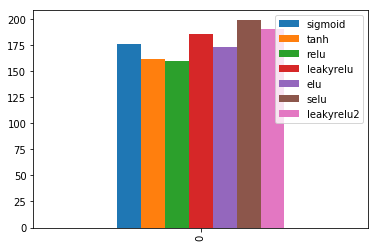

In [54]:

data_time = pd.DataFrame(key_time)
data_time.plot(kind='bar')


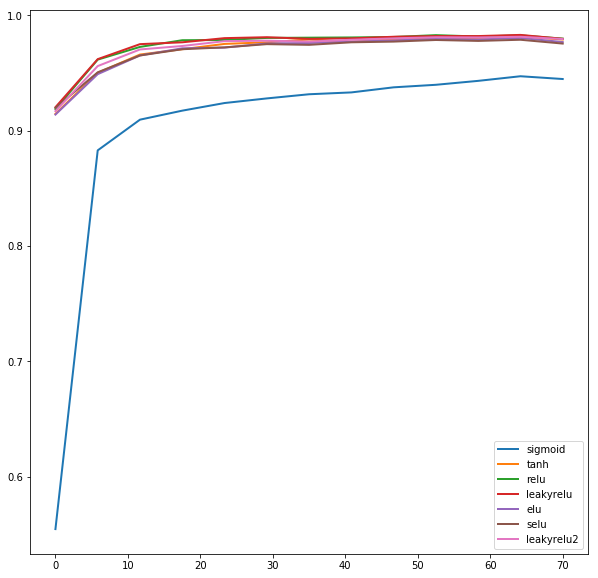

In [55]:
plt.figure(figsize=(10,10))
z = np.linspace(0, n_epochs+10, n_epochs//5+1)

for key, value in key_accuracy.items():
    plt.plot(z, value, linewidth=2, label=key)
plt.legend()

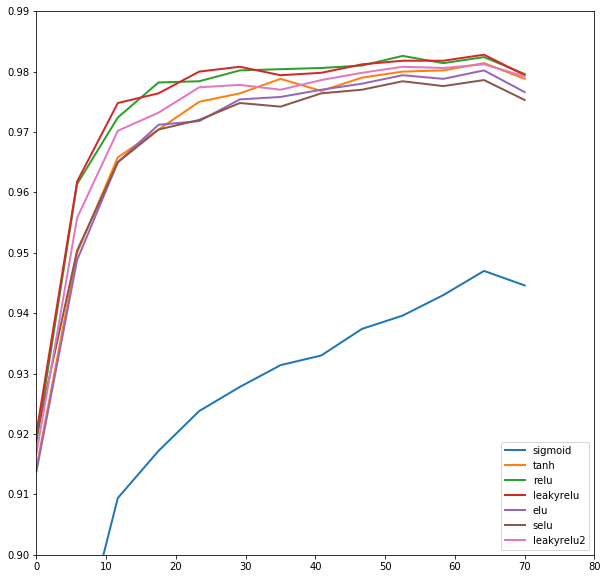

In [56]:
plt.figure(figsize=(10,10))
plt.axis([0, n_epochs+20, 0.9, 0.99])

for key, value in key_accuracy.items():
    plt.plot(z, value, linewidth=2, label=key)
plt.legend()

# Conclusion

In book Hands-On Machine Learning with Scikit-Learn & TensorFlow, the author marked:
1. 'in general ELU > leaky Relu(and its variants) > ReLU > tanh > logistic';   
2. leaky Relu with å = 0.2 may perform better than leaky Relu with å = 0.01;    
3. Selu outperforms the other activation functions very significantly for deep neural networks.  

In this experiment,   
1. It is true, logistic(sigmoid) works most poorly;
2. But Relu and leaky Relu work much better than ELU;
3. leaky Relu with å = 0.2 does not perform better thant leaky Relu with å = 0.01
4. Selu doesnot outperforms others


# Limitation   
    
1. In the experiment, the neural network has only two hidden layers.  
2. The dataset is MNIST. I didn't try other dataset.